In [1]:
import numpy as np
from aicsimageio import AICSImage
import os

In [2]:
path = '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/'
files = os.listdir(path)

gt_files = []
normal_files = []

for file in files:
    if (file.startswith('Unet_epoch_134') or file.startswith('Unet_gt_epoch_134')):
        file_path = os.path.join(path, file)
        if 'gt' in file_path:
            gt_files.append(file_path)
        else:
            normal_files.append(file_path)
        
gt_files.sort()
normal_files.sort()

In [3]:
normal_files

['/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_0_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_1000_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_1001_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_1002_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_1003_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_1004_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_1005_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_sto

In [4]:
gt_files

['/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_0_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1000_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1001_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1002_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1003_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1004_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1005_patches_s_2.tif',
 '/media/local-admin/ga

In [5]:
# Iterate over both lists simultaneously to pair files
file_pairs = []
for gt_file, normal_file in zip(gt_files, normal_files):
    file_pairs.append((gt_file, normal_file))

In [6]:
file_pairs

[('/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_0_patches_s_2.tif',
  '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_0_patches_s_2.tif'),
 ('/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1000_patches_s_2.tif',
  '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_1000_patches_s_2.tif'),
 ('/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1001_patches_s_2.tif',
  '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_1001_patches_s_2.tif'),
 ('/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_1002_patches_s_2.tif',
  '/media/local-admin/gal

In [7]:
file_pairs[0]

('/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_gt_epoch_134_channel_0_img_0_patches_s_2.tif',
 '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/Unet_epoch_134_channel_0_img_0_patches_s_2.tif')

In [8]:
image_pairs = []
for pair in file_pairs:
    target = AICSImage(pair[0])
    target_array = target.data

    pred = AICSImage(pair[1])
    pred_array = pred.data

    target_img = np.squeeze(target_array)
    pred_img = np.squeeze(pred_array)

    image_pairs.append((target_img, pred_img))

## Visualizing differences

In [77]:
import cv2

In [79]:
#diff_list = []
for i, image_pair in enumerate(image_pairs):
    diff = 1 - cv2.absdiff(image_pair[0], image_pair[1])
    img_name = normal_files[i][-47:-4]
    print(img_name)
    #diff_list.append((img_name, diff))
    filename = f'/media/local-admin/galaxy/lightmycells_storage/Study_overnight_many/res/GAN/{img_name}_viz.tif'
    cv2.imwrite(filename, diff) 

/GAN_epoch_1000_channel_0_img_0_PC_mito_nuc
GAN_epoch_1000_channel_0_img_10_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_1_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_2_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_3_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_4_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_5_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_6_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_7_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_8_PC_mito_nuc
/GAN_epoch_1000_channel_0_img_9_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_0_PC_mito_nuc
GAN_epoch_1000_channel_1_img_10_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_1_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_2_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_3_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_4_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_5_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_6_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_7_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_8_PC_mito_nuc
/GAN_epoch_1000_channel_1_img_9_PC_mito_nuc


In [49]:
#diff_list

## Metrics (needs to be updated: mean_metric, handling blank images)

In [80]:
from skimage.metrics import structural_similarity as ssim
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean, cosine
from sklearn.metrics import mean_absolute_error
import pandas as pd

In [81]:
def calculate_metrics(gt_image, pred_image):
    # Normalize the target and predicted images to the range [0, 1]                                        # Is this fine?
    target_img_normalized = (gt_image - gt_image.min()) / (gt_image.max() - gt_image.min())
    pred_img_normalized = (pred_image - pred_image.min()) / (pred_image.max() - pred_image.min())
    # Now, both images have values between 0 and 1
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(target_img_normalized.flatten(), pred_img_normalized.flatten())
    
    # Structural Similarity Index Measure (SSIM)    
    ssim_score = ssim(target_img_normalized, pred_img_normalized, data_range=1)      # data_range?
    
    # Pearson Correlation Coefficient (PCC)
    pcc, _ = pearsonr(target_img_normalized.flatten(), pred_img_normalized.flatten())
    
    # Euclidean Distance (ECD)
    ecd = euclidean(target_img_normalized.flatten(), pred_img_normalized.flatten())
    
    # Cosine Distance (ECD)
    cosine_dist = cosine(target_img_normalized.flatten(), pred_img_normalized.flatten())
    
    return mae, ssim_score, pcc, ecd, cosine_dist

In [82]:
results = []

for i,image_pair in enumerate(image_pairs):
    img_name = normal_files[i][-47:-4]
    mae, ssim_score, pcc, ecd, cosine_dist = calculate_metrics(image_pair[0], image_pair[1])
    results.append({'Filename': img_name, 'MAE': mae, 'SSIM': ssim_score, 'PCC': pcc, "ECD":ecd, "Cosine_dist":cosine_dist})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Save DataFrame to CSV
csv_path = "/media/local-admin/galaxy/lightmycells_storage/Study_overnight_many/res/GAN/metrics_results_500.csv"
df.to_csv(csv_path, index=False)

## Plotting pred and gt

#### Single pred gt pair

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Load the prediction and ground truth images
prediction_path = '/media/local-admin/galaxy/lightmycells_storage/Study_loss_experiments/tools/result/Unet/Unet_epoch_1000_channel_0_img_0_All_organelles_mloss.tif'
ground_truth_path = '/media/local-admin/galaxy/lightmycells_storage/Study_loss_experiments/tools/result/Unet/Unet_gt_epoch_1000_channel_0_img_0_All_organelles_mloss.tif'
prediction_image = Image.open(prediction_path)
ground_truth_image = Image.open(ground_truth_path)

np_pred= np.array(prediction_image)
np_gt = np.array(ground_truth_image)

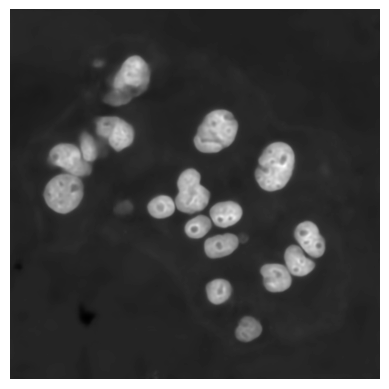

In [36]:
plt.imshow(np_pred, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [41]:
# Ensure both images have the same size
assert prediction_image.size == ground_truth_image.size, "Prediction and ground truth images must have the same size"

# Combine the images horizontally
np_combined = np.concatenate((np_pred, np_gt), axis=1)

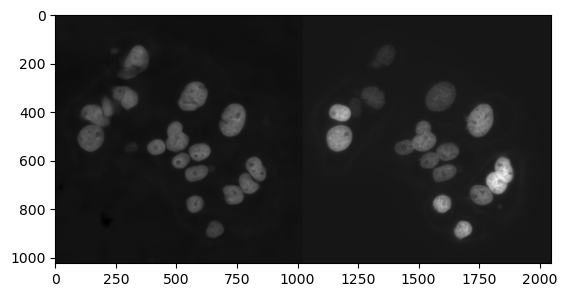

In [42]:
plt.imshow(np_combined, cmap='gray')

In [48]:
combined_image = Image.fromarray(np_combined)
#combined_image.save('/media/local-admin/galaxy/lightmycells_storage/Study_loss_experiments/tools/result/Unet/combined_image.tif')

In [49]:
rescaled_image = (np_combined - np_combined.min()) / (np_combined.max() - np_combined.min()) * 255

# Convert to uint8 data type
rescaled_image = rescaled_image.astype(np.uint8)

# Create PIL image from the array
combined_image = Image.fromarray(rescaled_image)

# Save the image as PNG
combined_image.save('/media/local-admin/galaxy/lightmycells_storage/Study_loss_experiments/tools/result/Unet/combined_image.png')

#### All pred gt pairs (2 images per slide)

In [10]:
from PIL import Image
import numpy as np
import os
from natsort import natsorted

In [11]:
# Directory containing prediction and ground truth pairs
pair_directory = '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/Unet/'
output_directory = '/media/local-admin/galaxy/lightmycells_storage/Study_patches_s_2/tools/result/visualizations/'

# Iterate over each pair in the directory
for filename in os.listdir(pair_directory):
    if filename.startswith('Unet_epoch') and filename.endswith('.tif'):
        # Load the prediction and ground truth images
        prediction_path = os.path.join(pair_directory, filename)
        ground_truth_path = os.path.join(pair_directory, f'Unet_gt_{filename[5:]}')  # Assuming ground truth files have the same format

        prediction_image = Image.open(prediction_path)
        ground_truth_image = Image.open(ground_truth_path)

        np_pred = np.array(prediction_image)
        np_gt = np.array(ground_truth_image)

        # Ensure both images have the same size
        assert prediction_image.size == ground_truth_image.size, "Prediction and ground truth images must have the same size"

        # Combine the images horizontally
        np_combined = np.concatenate((np_pred, np_gt), axis=1)
        combined_image = Image.fromarray(np_combined)

        rescaled_image = (np_combined - np_combined.min()) / (np_combined.max() - np_combined.min()) * 255

        # Convert to uint8 data type
        rescaled_image = rescaled_image.astype(np.uint8)

        # Create PIL image from the array
        combined_image = Image.fromarray(rescaled_image)


        # Save the combined image
        output_filename = os.path.join(output_directory, f'combined_{filename[:-3]}.png')
        combined_image.save(output_filename)

AssertionError: Prediction and ground truth images must have the same size

#### All pred gt pairs (3 images per slide: original loss, modified loss, gt)

In [3]:
# Directory containing prediction and ground truth pairs
pair_directory = '/media/local-admin/galaxy/lightmycells_storage/Study_loss_experiments_2/tools/result/Unet/'
output_directory = '/media/local-admin/galaxy/lightmycells_storage/Study_loss_experiments_2/tools/visualizations/'

combined_image_l = []

# Iterate over each pair in the directory
for filename in natsorted(os.listdir(pair_directory)):
    if filename.startswith('Unet_epoch') and filename.endswith('.tif'):
        # Load the prediction and ground truth images
        prediction_path = os.path.join(pair_directory, filename)
        ground_truth_path = os.path.join(pair_directory, f'Unet_gt_{filename[5:]}')  # Assuming ground truth files have the same format

        prediction_image = Image.open(prediction_path)
        ground_truth_image = Image.open(ground_truth_path)

        np_pred = np.array(prediction_image)
        
        np_gt = np.array(ground_truth_image)


        # Combine the images horizontally
        np_combined = np.concatenate((np_pred, np_gt), axis=1)
        
        # Create PIL image from the array
        combined_image = Image.fromarray(np_combined)

        combined_image_l.append(combined_image)

In [4]:
pair_directory_2 = '/media/local-admin/galaxy/lightmycells_storage/Study_all_organelles/tools/result/Unet/'
output_directory = '/media/local-admin/galaxy/lightmycells_storage/'

# Iterate over each pair in the directory
i = 0
for filename in natsorted(os.listdir(pair_directory_2)):
    if filename.startswith('Unet_epoch') and filename.endswith('.tif'):
        # Load the prediction and ground truth images
        prediction_path = os.path.join(pair_directory_2, filename)
        prediction_image = Image.open(prediction_path)
        ground_truth_image = combined_image_l[i]
        i += 1
        
        np_pred = np.array(prediction_image)
        
        np_gt = np.array(ground_truth_image)

        # Combine the images horizontally
        np_combined = np.concatenate((np_pred, np_gt), axis=1)        
        rescaled_image = (np_combined - np_combined.min()) / (np_combined.max() - np_combined.min()) * 255
        rescaled_image = rescaled_image.astype(np.uint8)
        combined_image = Image.fromarray(rescaled_image)
        

        # Save the combined image
        output_filename = os.path.join(output_directory, f'combined_{filename[:-3]}.png')
        combined_image.save(output_filename)

#### Single file (redundant)

In [53]:
#import numpy as np
#from aicsimageio import AICSImage
#import os

In [54]:
#target_path = '/media/local-admin/Extra_space_for_/Study_PC_mito_nuc/tools/result/1/epoch_299_channel_1_img_0.tif'
#pred_path = '/media/local-admin/Extra_space_for_/Study_PC_mito_nuc/tools/result/1/gt_epoch_299_channel_1_img_0.tif'

In [55]:
#target = AICSImage(target_path)
#target_array = target.data
#print(target_array.shape)

#pred = AICSImage(pred_path)
#pred_array = pred.data
#print(pred_array.shape)

In [56]:
#target_img = np.squeeze(target_array)
#pred_img = np.squeeze(pred_array)

In [57]:
#print(target_img.shape)
#print(pred_img.shape)

In [58]:
#import cv2

In [59]:
#diff = 1 - cv2.absdiff(target_img, pred_img)
##cv2.imshow('diff', diff)
##cv2.waitKey()

In [60]:
#img_name = pred_path[-26:]

In [61]:
#filename = f'/media/local-admin/Extra_space_for_/Study_PC_mito_nuc/tools/visualizations/{img_name}_viz2.tif'
#cv2.imwrite(filename, diff) 

In [62]:
#from skimage.metrics import structural_similarity as ssim
#from scipy.stats import pearsonr
#from scipy.spatial.distance import euclidean, cosine
#from sklearn.metrics import mean_absolute_error
#import pandas as pd

In [63]:
#def calculate_metrics(gt_image, pred_image):
    ## Normalize the target and predicted images to the range [0, 1]                                        # Is this fine?
    #target_img_normalized = (gt_image - gt_image.min()) / (gt_image.max() - gt_image.min())
    #pred_img_normalized = (pred_image - pred_image.min()) / (pred_image.max() - pred_image.min())
    ## Now, both images have values between 0 and 1
    
    ## Mean Absolute Error (MAE)
    #mae = mean_absolute_error(target_img_normalized.flatten(), pred_img_normalized.flatten())
    
    ## Structural Similarity Index Measure (SSIM)    
    #ssim_score = ssim(target_img_normalized, pred_img_normalized, data_range=1)      # data_range?
    
    ## Pearson Correlation Coefficient (PCC)
    #pcc, _ = pearsonr(target_img_normalized.flatten(), pred_img_normalized.flatten())
    
    ## Euclidean Distance (ECD)
    #ecd = euclidean(target_img_normalized.flatten(), pred_img_normalized.flatten())
    
    ## Cosine Distance (ECD)
    #cosine_dist = cosine(target_img_normalized.flatten(), pred_img_normalized.flatten())
    
    #return mae, ssim_score, pcc, ecd, cosine_dist

In [64]:
#mae, ssim_score, pcc, ecd, cosine_dist = calculate_metrics(target_img, pred_img)

#print("Mean Absolute Error (MAE):", mae)
#print("Structural Similarity Index Measure (SSIM):", ssim_score)
#print("Pearson Correlation Coefficient (PCC):", pcc)
#print("Euclidean Distance (ECD):", ecd)
#print("Cosine Distance (ECD):", cosine_dist)